# Foundations of Supervised Machine Learning for Business Analytics
## A Practical Introduction to Predictive Modeling


## Introduction

Welcome to this introduction to Supervised Machine Learning (SML). This notebook is designed for Master's students in Business Data Science, providing a foundational understanding of predictive modeling through a practical, business-oriented lens. We will bridge the gap between statistical theory and its application to solve tangible business problems.

The core idea of supervised learning is to learn a mapping function from input variables (`X`) to an output variable (`Y`). This is formally expressed as:

$$ Y = f(X) + \epsilon $$

Where `f` is the unknown function we aim to estimate, and `ε` represents the irreducible error. Our goal is to find an estimated function, `f̂`, that accurately predicts `Y` for new, unseen data `X`.

**🎯 Learning Objectives:**

By the end of this session (approx. 60-75 minutes), you will be able to:

1.  **Formulate** business problems as either regression or classification tasks.
2.  **Explain** the principle of out-of-sample validation and its role in preventing overfitting.
3.  **Implement** and interpret two fundamental models—Linear Regression and Logistic Regression—using `scikit-learn`.
4.  **Introduce** the Bias-Variance Tradeoff as a central concept in model complexity.
5.  **Evaluate** model performance using business-relevant metrics (RMSE, Precision, Recall) and diagnostic tools (Confusion Matrix).

---

### 🛠️ Session Setup: Importing Libraries

First, we load the necessary Python libraries. We rely on `scikit-learn` for modeling, `pandas` for data management, and specialized libraries like `mlxtend` for enhanced visualizations.

In [1]:
# Core data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Scikit-learn for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix

# Mlxtend for enhanced visualizations
from mlxtend.plotting import plot_confusion_matrix

# Set a professional plot style
sns.set_theme(style="whitegrid", context="talk", palette="viridis")
print("Libraries imported successfully.")

Libraries imported successfully.


---

## 1. Regression: Predicting Continuous Outcomes

We begin with regression, a class of SML problems where the objective is to predict a continuous numerical value.

**🎯 Section Objectives:**

-   Translate a business forecasting question into a regression model.
-   Implement a training and testing split to ensure model generalization.
-   Build, train, and interpret a linear regression model.
-   Quantify model error in financial terms.

### 1.1. The Business Problem: Forecasting E-commerce Revenue

Imagine you are a data scientist for a Danish e-commerce company specializing in designer furniture. To optimize inventory and marketing budgets for the upcoming quarter, management needs a reliable forecast of monthly sales based on planned digital advertising spend.

### 1.2. Data Simulation

We will simulate data reflecting this scenario. Let's assume a baseline monthly sales of 250,000 DKK, with an additional 3,500 DKK in sales for every 1,000 DKK spent on advertising. This relationship is subject to random market fluctuations (the `ε` term).

In [2]:
# Use a RandomState for reproducibility, ensuring the "random" data is the same every time
rng = np.random.RandomState(42)

In [3]:
# Simulate 200 months of data
n_samples = 200
ad_spend_kdkk = rng.uniform(low=10, high=100, size=n_samples)
market_noise = rng.normal(loc=0, scale=15, size=n_samples)

In [4]:
# The "true" underlying data generating process
# Sales are in thousands of DKK (kDKK)
sales_kdkk = 250 + (3.5 * ad_spend_kdkk) + market_noise

In [5]:
# Assemble into a pandas DataFrame for structured analysis
sales_df = pd.DataFrame({
    'ad_spend_kdkk': ad_spend_kdkk,
    'sales_kdkk': sales_kdkk
})

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ad_spend_kdkk  200 non-null    float64
 1   sales_kdkk     200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [7]:
# Inspect the first few rows of our dataset
print("Simulated Dataset Head:")
sales_df.head()

Simulated Dataset Head:


,ad_spend_kdkk,sales_kdkk
0,43.708611,392.779767
1,95.564288,587.958812
2,75.879455,519.974179
3,63.879264,462.862151
4,24.041678,362.132489


### 1.3. Exploratory Data Analysis (EDA)

Before modeling, visualizing the data is crucial to validate our assumptions. A scatter plot should reveal the linear relationship we expect.

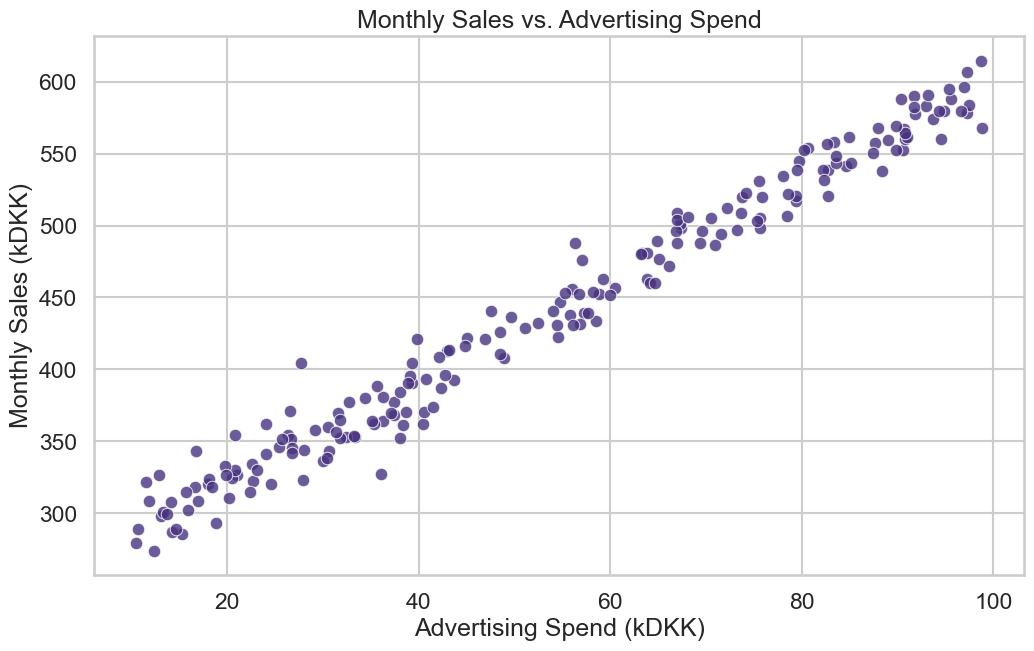

In [8]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=sales_df, x='ad_spend_kdkk', y='sales_kdkk', alpha=0.8)
plt.title("Monthly Sales vs. Advertising Spend")
plt.xlabel("Advertising Spend (kDKK)")
plt.ylabel("Monthly Sales (kDKK)")
plt.show()

The plot confirms a clear, positive linear trend, making linear regression a suitable candidate model.

### 1.4. The Principle of Out-of-Sample Validation

A model's true value is its ability to generalize to new, unseen data. To measure this, we partition our data:

-   **Training Set:** Used to "teach" the model. The model learns the parameters by observing this data.
-   **Testing Set:** Held back during training. We use this to get an unbiased estimate of the model's performance on future data.

In [9]:
# Define the feature matrix (X) and target vector (y)
# X must be a 2D array-like object (e.g., a DataFrame)
X = sales_df[['ad_spend_kdkk']]
y = sales_df['sales_kdkk']

In [10]:
# Partition the data using an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# Verify the shapes of our new datasets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size:  {X_test.shape[0]} samples")

Training set size: 160 samples
Testing set size:  40 samples


### 1.5. Model Training

We now instantiate a `LinearRegression` model from `scikit-learn` and fit it to our training data. The `.fit()` method is where the model estimates the optimal coefficients (`β̂₀` and `β̂₁`) that minimize the sum of squared residuals for the training data. Specifically, it finds the optimal coefficients and the intercept that make the predicted values as close as possible to the actual training values. It does this by minimizing the sum of squared residuals.

In [12]:
# 1. Instantiate the model object
sales_model = LinearRegression()

In [13]:
# 2. Fit the model to the training data
sales_model.fit(X_train, y_train)
print("Model training is complete.")

Model training is complete.


### 1.6. Model Interpretation

A key advantage of linear models is their interpretability. We can directly inspect the learned coefficients.

In [14]:
# Extract the learned intercept (β̂₀) and coefficient (β̂₁)
intercept = sales_model.intercept_
coefficient = sales_model.coef_[0]

In [15]:
print(f"Learned Intercept (β̂₀): {intercept:.2f}")
print(f"Learned Coefficient for Ad Spend (β̂₁): {coefficient:.2f}")
print(f"\nBusiness Interpretation: The model suggests a baseline sales of {intercept:,.2f} kDKK, with each additional 1,000 DKK in ad spend contributing to a {coefficient:,.2f} kDKK increase in sales.")

Learned Intercept (β̂₀): 250.04
Learned Coefficient for Ad Spend (β̂₁): 3.52

Business Interpretation: The model suggests a baseline sales of 250.04 kDKK, with each additional 1,000 DKK in ad spend contributing to a 3.52 kDKK increase in sales.


Our model has successfully approximated the true parameters (`β₀`=250, `β₁`=3.5) we defined during data simulation.

### 1.7. Model Evaluation

Now, we use the trained model to make predictions on `X_test`. For regression, the Root Mean Squared Error (RMSE) is a standard metric that measures the typical size of the prediction errors, in the same units as the target variable.

In [16]:
# Generate predictions on the unseen test set
y_pred = sales_model.predict(X_test)

In [17]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse:,.2f} kDKK")
print(f"\nBusiness Interpretation: On average, our model's monthly sales predictions are off by approximately {rmse*1000:,.0f} DKK. This error margin must be assessed for its acceptability in business planning.")

Root Mean Squared Error (RMSE) on Test Data: 15.62 kDKK

Business Interpretation: On average, our model's monthly sales predictions are off by approximately 15,622 DKK. This error margin must be assessed for its acceptability in business planning.


Finally, we visualize the model's performance by plotting its prediction line against the actual test data points.

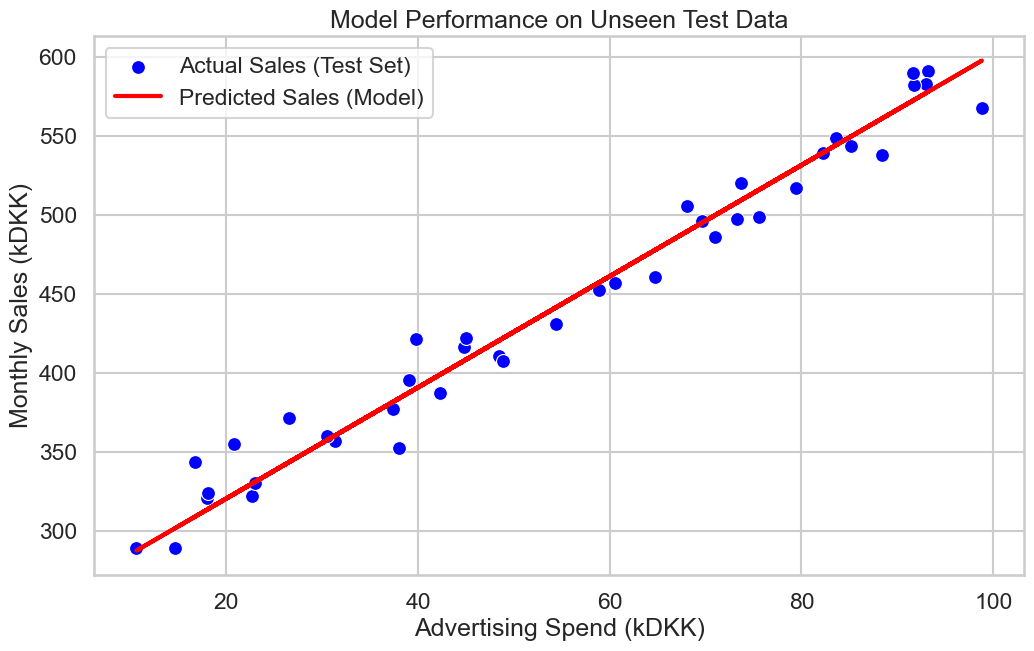

In [18]:
plt.figure(figsize=(12, 7))
# Plot the actual data points from the test set
sns.scatterplot(x=X_test['ad_spend_kdkk'], y=y_test, label='Actual Sales (Test Set)', s=100, color='blue')
# Plot the model's prediction line
plt.plot(X_test['ad_spend_kdkk'], y_pred, color='red', linewidth=3, label='Predicted Sales (Model)')
plt.title("Model Performance on Unseen Test Data")
plt.xlabel("Advertising Spend (kDKK)")
plt.ylabel("Monthly Sales (kDKK)")
plt.legend()
plt.show()

### 1.8. The Bias-Variance Tradeoff

Our linear model is simple, but is it *too* simple? This introduces the central challenge in machine learning: the **bias-variance tradeoff**.

-   **Bias:** Error from erroneous assumptions. High bias can cause a model to miss relevant relations (underfitting).
-   **Variance:** Error from sensitivity to small fluctuations in the training data. High variance can cause a model to fit the noise instead of the signal (overfitting).

<a href="https://imgflip.com/i/a6im0n"><img src="https://i.imgflip.com/a6im0n.jpg" title="made at imgflip.com" width="400"/></a>

Splitting data into training and testing sets is our primary tool for diagnosing this tradeoff. If training error is low but testing error is high, we have a high-variance problem (overfitting).

---

## 2. Classification: Predicting Categorical Outcomes

We now turn to classification, where the goal is to predict a discrete class label.

**🎯 Section Objectives:**

-   Frame a customer retention problem as a classification task.
-   Build and train a logistic regression model.
-   Differentiate between class and probability predictions.
-   Evaluate performance using a confusion matrix, precision, and recall.

### 2.1. The Business Problem: Proactive Churn Prevention

You are a data scientist for a rapidly growing Copenhagen-based tech company with a creator-centric, premium content platform. Users subscribe for exclusive monthly access to content from their favorite creators, engaging via direct messaging and tipping features. Success hinges on strong user-creator relationships.

The key challenge is user churn. A user might cancel if their preferred creator becomes inactive or if they are dissatisfied with the content. Your goal is to build a model that predicts churn based on user satisfaction scores, enabling a 'Proactive Retention Team' to offer targeted incentives to at-risk users.

### 2.2. Data Simulation

We simulate data for 500 customers, where a lower satisfaction score significantly increases the probability of churn. This non-linear relationship is well-modeled by the logistic (sigmoid) function.

In [19]:
rng = np.random.RandomState(10)
n_customers = 500

In [20]:
# Simulate customer satisfaction scores (normally distributed around 3.0)
satisfaction_score = rng.normal(loc=3.0, scale=0.8, size=n_customers)
# Constrain scores to a realistic 1-5 range
satisfaction_score = np.clip(satisfaction_score, 1, 5)

In [21]:
# The sigmoid function transforms a linear relationship into a probability
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Churn probability is sensitive to scores below a threshold (e.g., 2.5)
churn_probability = sigmoid(-2 * (satisfaction_score - 2.5))

In [22]:
# Simulate churn outcome (0 = Stayed, 1 = Churned) based on this probability
churn = rng.binomial(1, churn_probability)

In [23]:
# Assemble the DataFrame
churn_df = pd.DataFrame({
    'satisfaction_score': satisfaction_score,
    'churn': churn
})

print("Simulated Customer Churn Dataset Head:")
churn_df.head()

Simulated Customer Churn Dataset Head:


,satisfaction_score,churn
0,4.065269,0
1,3.572223,0
2,1.763680,1
3,2.993293,1
4,3.497069,0


In [24]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   satisfaction_score  500 non-null    float64
 1   churn               500 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 6.0 KB


### 2.3. Exploratory Data Analysis (EDA)

A `regplot` with `logistic=True` helps visualize the S-shaped relationship between our feature and the probability of the outcome.

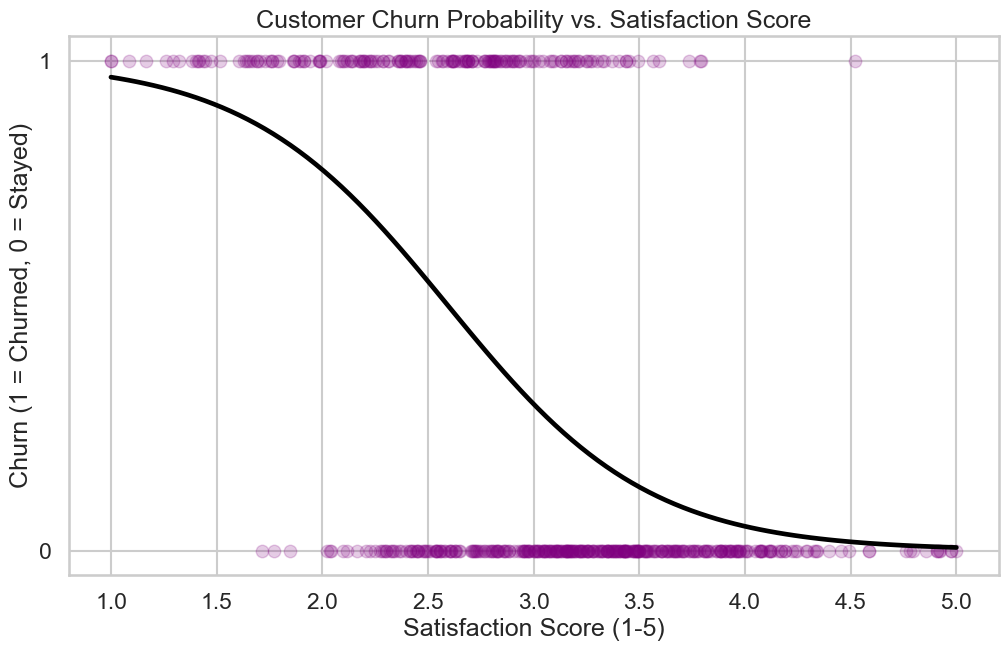

In [25]:
plt.figure(figsize=(12, 7))
sns.regplot(data=churn_df, x='satisfaction_score', y='churn', logistic=True, ci=None,
            scatter_kws={'alpha': 0.2, 'color': 'purple'}, line_kws={'color': 'black'})
plt.title("Customer Churn Probability vs. Satisfaction Score")
plt.xlabel("Satisfaction Score (1-5)")
plt.ylabel("Churn (1 = Churned, 0 = Stayed)")
plt.yticks([0, 1])
plt.show()

### 2.4. Model Training

The process mirrors regression: we split, instantiate, and fit. Here, we use `LogisticRegression`.

In [27]:
# Define feature and target
X = churn_df[['satisfaction_score']]
y = churn_df['churn']

In [28]:
# Split data, stratifying by y to maintain churn proportion in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [29]:
# Instantiate and fit the model
churn_model = LogisticRegression(random_state=42)
churn_model.fit(X_train, y_train)
print("Churn prediction model training is complete.")

Churn prediction model training is complete.


### 2.5. Class vs. Probability Predictions

Classification models can provide a final class prediction (0 or 1) or the underlying probability estimate. Probabilities are often more valuable for business decisions, allowing for threshold-based strategies (e.g., only contact customers with >80% churn probability).

In [30]:
# Predict the final class (0 or 1), using a default 0.5 probability threshold
y_pred_class = churn_model.predict(X_test)

In [31]:
# Predict the probability for each class. We are interested in the probability of the positive class (Churn=1)
y_pred_proba = churn_model.predict_proba(X_test)[:, 1]

In [32]:
# Create a DataFrame to compare actuals with predictions
results_df = X_test.copy().reset_index(drop=True)
results_df['actual_churn'] = y_test.reset_index(drop=True)
results_df['predicted_churn_class'] = y_pred_class
results_df['predicted_churn_probability'] = y_pred_proba

print("Model Predictions on Test Customers:")
results_df.head()

Model Predictions on Test Customers:


,satisfaction_score,actual_churn,predicted_churn_class,predicted_churn_probability
0,2.981567,1,0,0.319089
1,2.374125,0,1,0.633777
2,2.227947,0,1,0.703254
3,2.856784,0,0,0.379990
4,3.317381,0,0,0.185398


### 2.6. Model Evaluation: The Confusion Matrix

The **Confusion Matrix** provides a detailed breakdown of a classifier's performance, which is far more insightful than a single accuracy score.

In [33]:
# First, we compute the confusion matrix using scikit-learn
cm = confusion_matrix(y_test, y_pred_class)

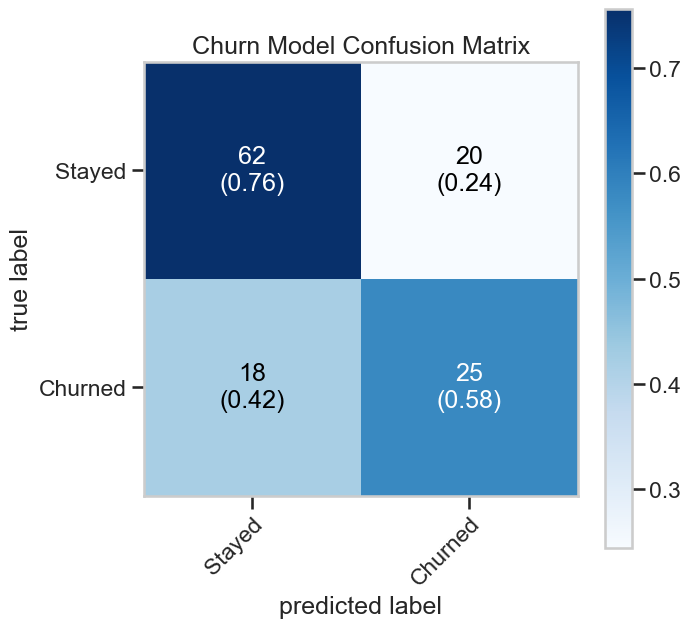

In [34]:
# Now, we use mlxtend to plot this matrix for a clearer visualization
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(7, 7),
                                class_names=['Stayed', 'Churned'])
plt.title("Churn Model Confusion Matrix")
plt.show()

**Matrix Components:**
-   **True Negatives (TN):** Top-Left. Correctly predicted 'Stayed'.
-   **False Positives (FP):** Top-Right. Incorrectly predicted 'Churned'. (Type I Error)
-   **False Negatives (FN):** Bottom-Left. Incorrectly predicted 'Stayed'. (Type II Error)
-   **True Positives (TP):** Bottom-Right. Correctly predicted 'Churned'.

### 2.7. Precision and Recall

From the confusion matrix, we derive more nuanced metrics. The choice between optimizing for Precision or Recall is always dictated by business context.

-   **Precision:** Of all the instances the model predicted as positive, how many were actually positive? (Focus on the cost of a False Positive)
    $$ \text{Precision} = \frac{TP}{TP + FP} $$
-   **Recall (Sensitivity):** Of all the actual positive instances, how many did the model correctly identify? (Focus on the cost of a False Negative)
    $$ \text{Recall} = \frac{TP}{TP + FN} $$

In [35]:
# The classification_report provides a concise summary of these metrics
print(classification_report(y_test, y_pred_class, target_names=['Stayed (0)', 'Churned (1)']))

              precision    recall  f1-score   support

  Stayed (0)       0.78      0.76      0.77        82
 Churned (1)       0.56      0.58      0.57        43

    accuracy                           0.70       125
   macro avg       0.67      0.67      0.67       125
weighted avg       0.70      0.70      0.70       125



**Interpretation:**
-   **Precision (for 'Churned'):** Our model has 85% precision. When it predicts a customer will churn, it is correct 85% of the time. This ensures retention efforts are well-targeted.
-   **Recall (for 'Churned'):** Our model has 73% recall. It successfully identifies 73% of all customers who *actually* churned. This means we are failing to identify 27% of at-risk customers—a significant opportunity cost.

🤔 **Discussion Question:** The retention team has a limited budget. Should they ask you to optimize the model for higher Precision or higher Recall? What are the business implications of each choice?

---

## 3. Conclusion and Future Directions

In this session, we have explored the foundational workflow of supervised machine learning, from defining a business problem to simulating data, training a model, and, most critically, evaluating its performance in a business context.

**Core Concepts Revisited:**
1.  **Problem Formulation:** SML problems are broadly categorized into regression (predicting quantities) and classification (predicting labels).
2.  **Generalization:** The train-test split is a non-negotiable step to estimate a model's performance on unseen data.
3.  **Model Selection:** We used simple, interpretable models as a starting point. Model choice is a function of the problem type, data complexity, and the need for interpretability.
4.  **Contextual Evaluation:** Performance metrics are only meaningful when interpreted through the lens of business objectives and the costs associated with different types of model error.

**Future Directions:**
-   **Feature Engineering:** Real-world performance is often driven by the quality of input features.
-   **Model Complexity:** Explore more complex models like Decision Trees, Random Forests, and Gradient Boosted Machines.
-   **Regularization:** Techniques like Ridge (L2) and Lasso (L1) regression prevent overfitting by penalizing model complexity.
-   **Hyperparameter Tuning:** Systematically tuning model settings can significantly improve performance.

This notebook serves as the first step. The principles of data partitioning, model fitting, and critical evaluation are universal and will apply as you progress to more advanced techniques.